# SampleSuperstore Data

#### Data Wrangling / Data Preprocessing 

In [1]:
# Step:1  -------> import all necessary libraries for EDA -------

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
# Step:2 -------> Load the DataSet
df = pd.read_csv('D:\\professional-python-learning\\cardekho.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [3]:
# Step:3 -------> check Missing Values 
df.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

In [4]:
# Step:4 -------> check Composition of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [5]:
# Step:5 ------> Impute missing value with appropriate method as we see in the above 
mean_value = df[['mileage(km/ltr/kg)']].mean()

In [6]:
# inplace is used to replace the changes in the actual dataSet t
df['mileage(km/ltr/kg)'].fillna(value=mean_value, inplace=True) 

In [7]:
from scipy import stats  # Import stats for mode function

mode_engine = df['engine'].mode(dropna=True)[0]  # Find most frequent engine (excluding missing values)
mode_seats = df['seats'].mode(dropna=True)[0]  # Find most frequent number of seats
max_power=df.dropna(inplace=True)
df['engine'].fillna(mode_engine, inplace=True)  # Replace missing values with mode
df['seats'].fillna(mode_seats, inplace=True)


In [8]:
# Repeat Step:3 -------> check Missing Values 
df.isnull().sum()

name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64

In [9]:
# Step:6 Check and remove duplicate values
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8123    False
8124    False
8125    False
8126     True
8127     True
Length: 7907, dtype: bool

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
# Step:7 Encode Categorical Variables 

# Ham categorical variables ko encode karte hain kyunki machine learning models ko numerical data ki zaroorat hoti hai. Categorical variables non-numerical hoti hain, jaise ki "engine" (petrol, diesel, etc.) ya "seats" (2, 4, etc.). Inhenそのままmachine learning models mein use nahin kiya ja sakta.

# Get_dummies() function aur OneHotEncoder class categorical variables ko one-hot encoded dummies mein convert karte hain. One-hot encoding mein, har category ko ek separate column mein represent kiya jata hai. For example, "engine" column ke liye, petrol, diesel, aur CNG ke liye separate columns honge.

# Yeh encoding machine learning models ke liye categorical variables ko samajhna aasan banata hai. Models is data ko use karke predictions kar sakte hain.


# ... your code for creating the DataFrame (df) ...
categorical_columns = ['engine', 'seats']  # Assuming these are categorical

# Pass the DataFrame to get_dummies
df_dummies = pd.get_dummies(df[categorical_columns])

# Concatenate with original DataFrame (optional)
df = pd.concat([df, df_dummies], axis=1)

# EDA

In [13]:
# two check the first 3 rows of our dataset
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,engine,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0,1248.0,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,1498.0,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0,1497.0,5.0


In [14]:
# to check the composition/datatypes of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6718 non-null   object 
 1   year                6718 non-null   int64  
 2   selling_price       6718 non-null   int64  
 3   km_driven           6718 non-null   int64  
 4   fuel                6718 non-null   object 
 5   seller_type         6718 non-null   object 
 6   transmission        6718 non-null   object 
 7   owner               6718 non-null   object 
 8   mileage(km/ltr/kg)  6718 non-null   float64
 9   engine              6718 non-null   float64
 10  max_power           6718 non-null   object 
 11  seats               6718 non-null   float64
 12  engine              6718 non-null   float64
 13  seats               6718 non-null   float64
dtypes: float64(5), int64(3), object(6)
memory usage: 787.3+ KB


In [15]:
# to check the shape of our dataset like total number of rows and columns
df.shape

(6718, 14)

In [16]:
# to check all the columns names that are present in our dataset
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats', 'engine', 'seats'],
      dtype='object')

In [17]:
# to check the statistical summary of our dataset
df.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats,engine,seats
count,6718.000000,6.718000e+03,6.718000e+03,6718.00000,6718.000000,6718.000000,6718.000000,6718.000000
mean,2013.609110,5.263196e+05,7.340230e+04,19.46531,1430.891337,5.434653,1430.891337,5.434653
std,3.900648,5.235398e+05,5.869980e+04,4.04915,493.493277,0.984230,493.493277,0.984230
min,1994.000000,2.999900e+04,1.000000e+00,0.00000,624.000000,2.000000,624.000000,2.000000
25%,2011.000000,2.500000e+05,3.800000e+04,16.80000,1197.000000,5.000000,1197.000000,5.000000
50%,2014.000000,4.200000e+05,6.822150e+04,19.44000,1248.000000,5.000000,1248.000000,5.000000
75%,2017.000000,6.500000e+05,1.000000e+05,22.50000,1498.000000,5.000000,1498.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.00000,3604.000000,14.000000,3604.000000,14.000000


In [18]:
 # here we remove the duplicate column in our dataset which is engine
 df.T.drop_duplicates().T

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9,998.0,67.1,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8,1493.0,110,5.0


Text(0, 0.5, 'Density')

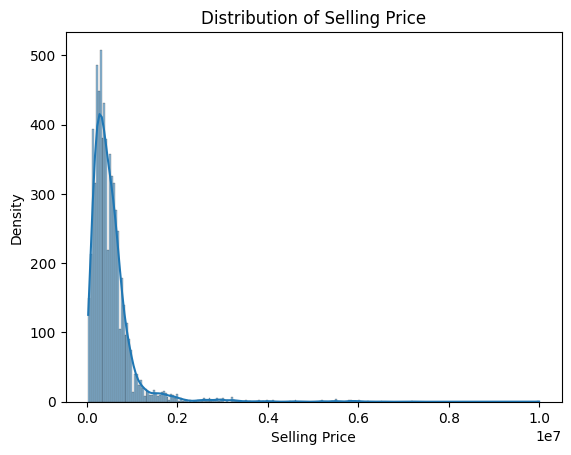

In [19]:
sns.histplot(df, x=df['selling_price'], kde=1)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Density')

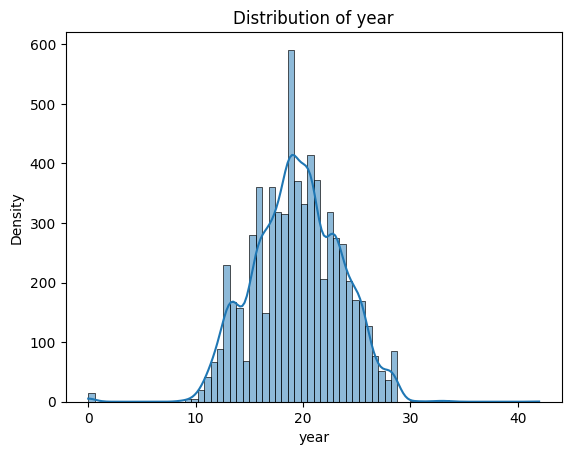

In [20]:
sns.histplot(df, x=df['mileage(km/ltr/kg)'], kde=1)
plt.title('Distribution of year')
plt.xlabel('year')
plt.ylabel('Density')
plt.show()

In [21]:
# here we are applying normality test
from scipy.stats import norm
stats.shapiro(df['selling_price'])

d:\Python\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.5954420566558838, pvalue=0.0)

In [22]:
df.isnull().sum()

name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
engine                0
seats                 0
dtype: int64

In [23]:
# Simple feature Scaling
df['mileage(km/ltr/kg)'] = df['mileage(km/ltr/kg)'] / df['mileage(km/ltr/kg)'].max()
df['selling_price'] = df['selling_price'] / df['selling_price'].max()
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,engine,seats
0,Maruti Swift Dzire VDI,2014,0.0450,145500,Diesel,Individual,Manual,First Owner,0.557143,1248.0,74,5.0,1248.0,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,0.0370,120000,Diesel,Individual,Manual,Second Owner,0.503333,1498.0,103.52,5.0,1498.0,5.0
2,Honda City 2017-2020 EXi,2006,0.0158,140000,Petrol,Individual,Manual,Third Owner,0.421429,1497.0,78,5.0,1497.0,5.0
3,Hyundai i20 Sportz Diesel,2010,0.0225,127000,Diesel,Individual,Manual,First Owner,0.547619,1396.0,90,5.0,1396.0,5.0
4,Maruti Swift VXI BSIII,2007,0.0130,120000,Petrol,Individual,Manual,First Owner,0.383333,1298.0,88.2,5.0,1298.0,5.0


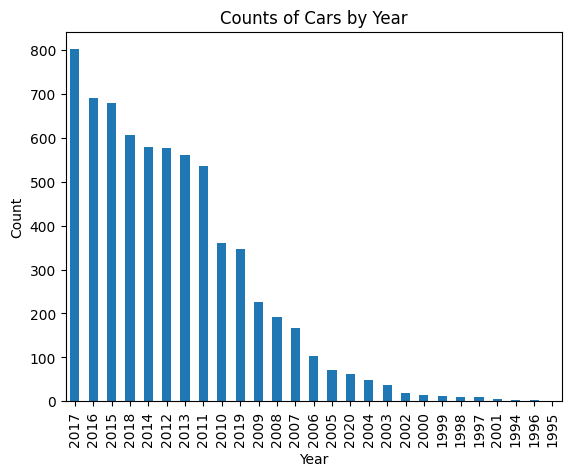

In [31]:
# Visualize the distribution of numerical features

df['year'].value_counts().plot(kind='bar')
plt.title('Counts of Cars by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

<Axes: ylabel='km_driven'>

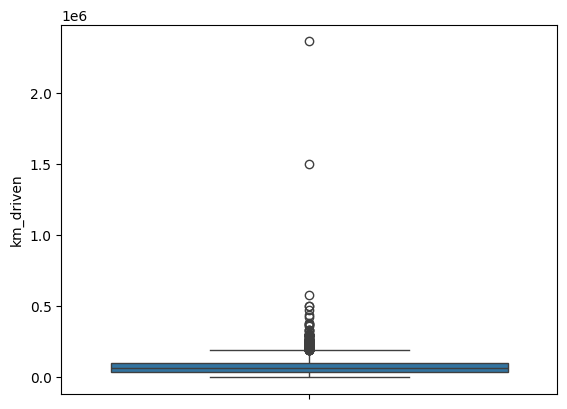

In [32]:
sns.boxplot(df['km_driven'])

In [33]:
# Outliers remove in column 'kms_driven'
# Calculate the IQR
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the upper limit
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q3 -  1.5 *IQR

# Filter the DataFrame for outliers
outliers = df[df['km_driven'] > upper_limit]
outliers2 = df[df['km_driven'] < lower_limit]
# Display the outliers
print("Outliers in 'km_driven' column:")
print(outliers)
print(outliers2)



Outliers in 'km_driven' column:
                                      name  year  selling_price  km_driven  \
287         Mahindra Bolero DI DX 7 Seater  2007         0.0210     207890   
394   Toyota Innova 2.5 G1 Diesel 8-seater  2005         0.0250     240000   
396         Hyundai Verna XXi ABS (Petrol)  2009         0.0340     214000   
397                  Hyundai Verna CRDi SX  2009         0.0340     214000   
401                         Tata Indigo LS  2012         0.0095     265000   
...                                    ...   ...            ...        ...   
8031      Chevrolet Enjoy TCDi LT 7 Seater  2014         0.0275     195000   
8033                  Hyundai Verna 1.6 SX  2012         0.0450     200000   
8071   Toyota Innova 2.5 V Diesel 7-seater  2010         0.0425     200000   
8077             Toyota Innova 2.5 E 7 STR  2009         0.0550     250000   
8095             Ford Figo Diesel Titanium  2012         0.0260     194000   

        fuel seller_type transm

In [34]:
removeupper = df.copy()
removelower = df.copy()
removeupper['km_driven'] = np.where(
    removeupper['km_driven'] > upper_limit,
    upper_limit,
    np.where(
         removelower['km_driven'] < lower_limit,
        lower_limit,
        removeupper['km_driven']
    )
)

In [35]:
print(removeupper)
print(removelower)

                                   name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         0.0450   145500.0   
1          Skoda Rapid 1.5 TDI Ambition  2014         0.0370   120000.0   
2              Honda City 2017-2020 EXi  2006         0.0158   140000.0   
3             Hyundai i20 Sportz Diesel  2010         0.0225   127000.0   
4                Maruti Swift VXI BSIII  2007         0.0130   120000.0   
...                                 ...   ...            ...        ...   
8121  Maruti Wagon R VXI BS IV with ABS  2013         0.0260    50000.0   
8122         Hyundai i20 Magna 1.4 CRDi  2014         0.0475    80000.0   
8123                  Hyundai i20 Magna  2013         0.0320   110000.0   
8124              Hyundai Verna CRDi SX  2007         0.0135   119000.0   
8125             Maruti Swift Dzire ZDi  2009         0.0382   120000.0   

        fuel seller_type transmission                 owner  \
0     Diesel  Individual       Manua

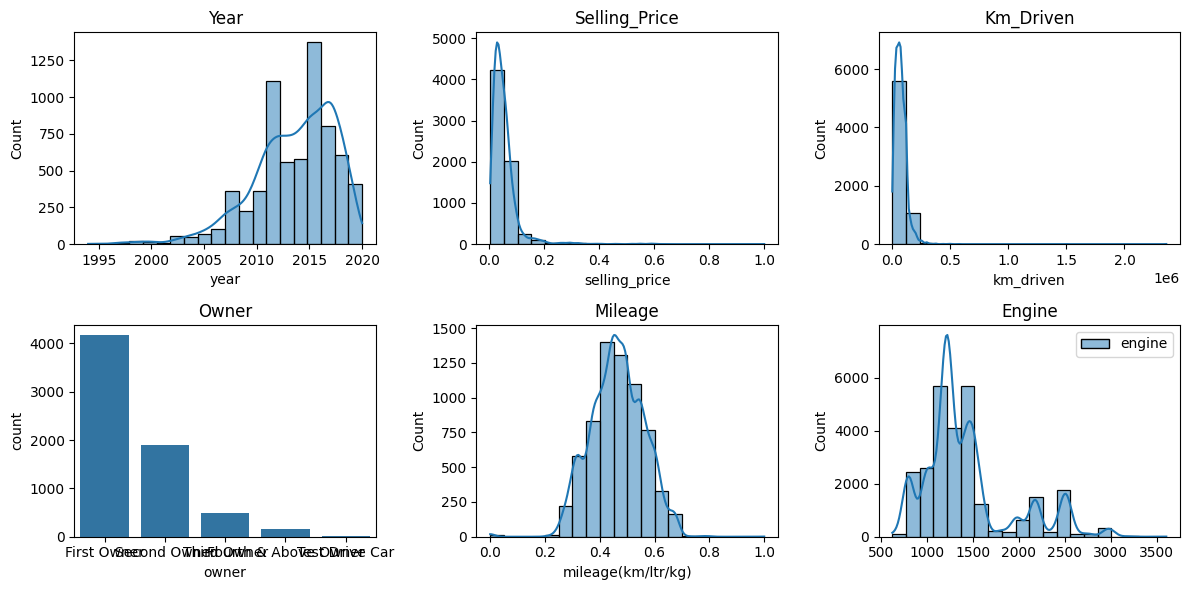

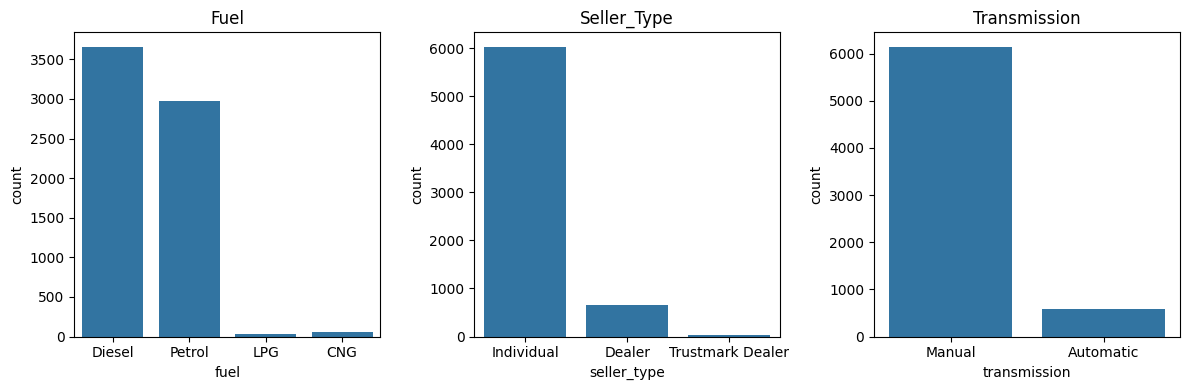

In [36]:
# Visualize the distribution of numerical features
plt.figure(figsize=(12, 6))

# Year
plt.subplot(2, 3, 1)
sns.histplot(df['year'], bins=20, kde=True)
plt.title('Year')

# Selling_Price
plt.subplot(2, 3, 2)
sns.histplot(df['selling_price'], bins=20, kde=True)
plt.title('Selling_Price')

# Km_Driven
plt.subplot(2, 3, 3)
sns.histplot(df['km_driven'], bins=20, kde=True)
plt.title('Km_Driven')

# Owner
plt.subplot(2, 3, 4)
sns.countplot(data=df, x='owner')
plt.title('Owner')
# Mileage
plt.subplot(2, 3, 5)
sns.histplot(df['mileage(km/ltr/kg)'], bins=20, kde=True)
plt.title('Mileage')

# Engine
plt.subplot(2, 3, 6)
sns.histplot(df['engine'], bins=20, kde=True)
plt.title('Engine')

plt.tight_layout()
plt.show()
# Visualize the categorical features
plt.figure(figsize=(12, 4))

# Fuel
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='fuel')
plt.title('Fuel')

# Seller_Type
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='seller_type')
plt.title('Seller_Type')
# Transmission
plt.subplot(1, 3, 3)
sns.countplot(data=df, x='transmission')
plt.title('Transmission')

plt.tight_layout()
plt.show()